# **Task 1**
# Titanic Survival Prediction

This task uses the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. The dataset typically contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

## 1. Data Import and Setup
First, necessary libraries are imported to handle the dataset, perform machine learning tasks, and create visualizations. These libraries include:
- **Pandas** for loading and manipulating data.
- **NumPy** for performing numerical operations.
- **Matplotlib** and **Seaborn** for creating various visualizations.
- **Scikit-learn** for machine learning functions such as model training and evaluation.

## 2. Loading the Dataset
The Titanic dataset is loaded into a pandas DataFrame from a CSV file. The dataset consists of multiple features describing the passengers, including age, sex, class, fare, cabin, and whether they survived.

## 3. Data Cleaning
- **Removing Irrelevant Columns**: Unnecessary columns such as `PassengerId`, `Name`, `Ticket`, and `Cabin` are dropped as they do not contribute to predicting the survival status of passengers.
- **Handling Missing Values**:
  - Missing values in the `Age` column are replaced with the median value of the column.
  - Missing values in the `Embarked` column are filled with the mode (most frequent value) of the column.

## 4. Encoding Categorical Variables
Categorical variables like `Sex` and `Embarked` are converted into numeric values using one-hot encoding. This technique transforms the categorical columns into binary columns (e.g., male/female for `Sex`), ensuring that the machine learning model can understand and process the data.

## 5. Feature and Target Definition
The dataset is divided into:
- **Features (X)**: All columns except the target column `Survived`.
- **Target (y)**: The `Survived` column, which indicates whether the passenger survived or not.

## 6. Data Splitting
The data is split into a **training set** (used to train the model) and a **testing set** (used to evaluate the model). Typically, 80% of the data is used for training, and 20% is reserved for testing.

## 7. Feature Scaling
To ensure that all features are on the same scale and avoid any feature dominating the model, **feature scaling** is applied. This is achieved using a standard scaler to normalize the data.

## 8. Model Training
A **Logistic Regression** model is trained on the training dataset. Logistic regression is a suitable model for binary classification problems like survival prediction, where the output is either 0 (did not survive) or 1 (survived).

## 9. Model Evaluation
After training the model, its performance is evaluated using several metrics:
- **Accuracy**: The percentage of correct predictions made by the model.
- **Classification Report**: A detailed report including precision, recall, F1-score, and support for each class (survived and not survived).
- **Confusion Matrix**: A matrix that shows the number of true positive, false positive, true negative, and false negative predictions, providing deeper insights into the model's performance.

## 10. Visualizations
Several visualizations are created to help assess the model's performance:
- **Confusion Matrix**: A heatmap visualization showing the true and predicted values, helping to identify misclassifications.
- **ROC Curve**: A plot that illustrates the model's ability to distinguish between classes. It also displays the Area Under the Curve (AUC), a measure of the model’s overall performance.
- **Precision-Recall Curve**: A graph showing the trade-off between precision and recall, providing an additional perspective on model performance, especially in imbalanced datasets.
- **Feature Importance**: A bar chart that visualizes the coefficients of the logistic regression model, highlighting which features are most important for predicting survival.

## 11. Conclusion
This task demonstrates how the Titanic dataset can be used to predict the survival of passengers using logistic regression. The evaluation metrics and visualizations provide a comprehensive understanding of the model's performance and the importance of various features in making survival predictions.




=== Model Evaluation Results ===
Accuracy: 81.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



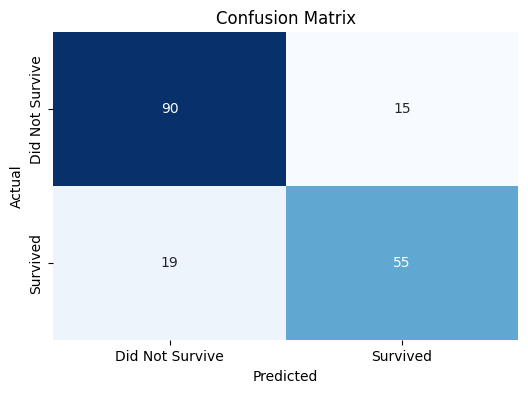

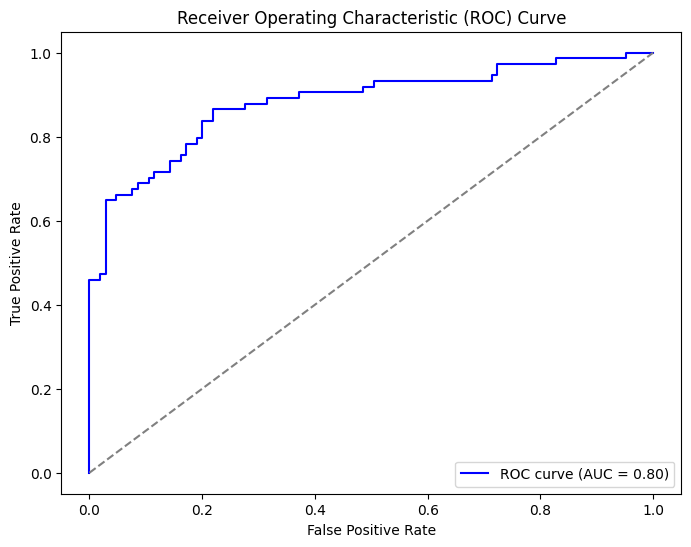

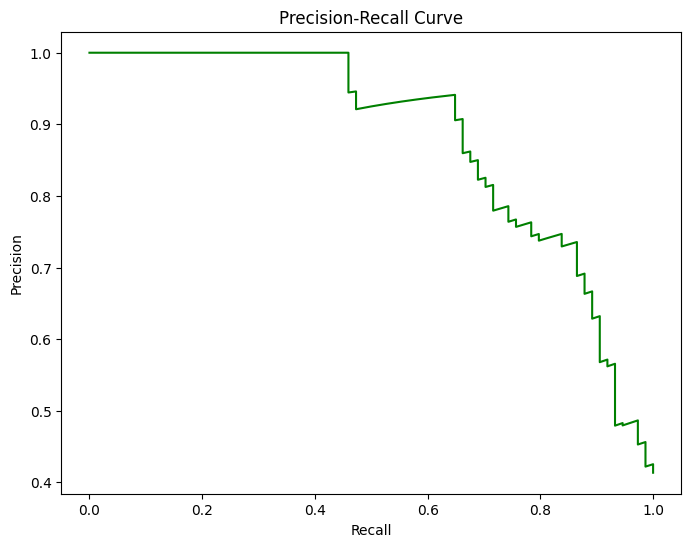

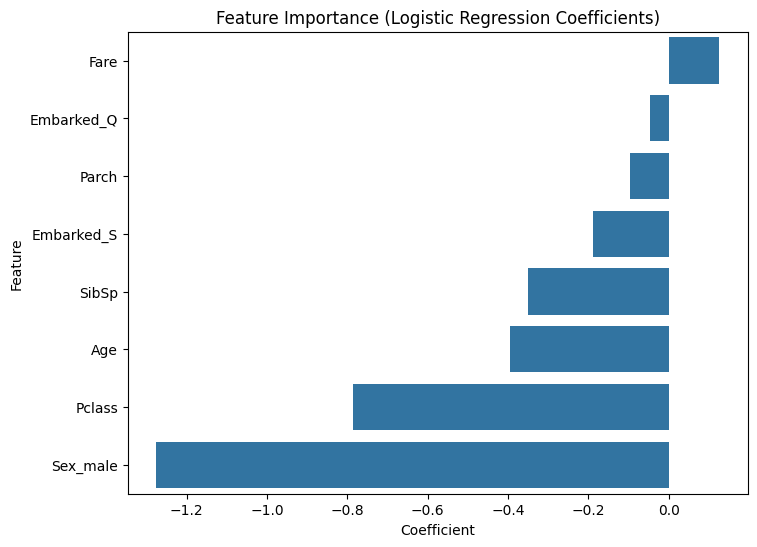

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Data Cleaning
# Drop irrelevant columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing 'Age' with median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing 'Embarked' with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Define features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Clean and formatted output
print("\n=== Model Evaluation Results ===")
print(f"Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_rep)

# --- Visualizations --- #

# 1. Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Did Not Survive", "Survived"], yticklabels=["Did Not Survive", "Survived"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Plot ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 3. Plot Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# 4. Plot feature importance (coefficient values from logistic regression)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values(by='Coefficient', ascending=False))
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

# **Task 2**
# Movie Rating Prediction

This task uses the Movies India dataset to build a model that predicts movie ratings based on several features, such as the genre, director, and actors involved. The goal is to predict the rating a movie would receive, leveraging features like the genre of the movie, the director, and the main actors.

## 1. Data Import and Setup
The necessary libraries for data manipulation, machine learning, and visualization are imported. These libraries include:
- **Pandas** for loading and handling the dataset.
- **NumPy** for performing numerical operations.
- **Seaborn** and **Matplotlib** for creating various visualizations.
- **Scikit-learn** for machine learning tasks, such as preprocessing, model training, and evaluation.

## 2. Loading the Dataset
The Movies India dataset is loaded into a pandas DataFrame from a CSV file. This dataset contains information about various movies, including their genre, director, main actors, and ratings.

## 3. Data Inspection
To understand the structure of the data, an initial inspection is performed:
- The first few rows of the dataset are printed to get a quick overview.
- The dataset’s general information is displayed, including the number of non-null entries.
- The missing values in each column are counted to check for any gaps in the data.

## 4. Data Cleaning
- **Removing Irrelevant Columns**: Columns unrelated to predicting the movie rating are discarded.
- **Handling Missing Values**: Any rows with missing values in the relevant columns (features or target) are dropped to ensure the model uses complete data.
- **Combining Actor Columns**: The individual actor columns (`Actor 1`, `Actor 2`, and `Actor 3`) are combined into a single `Actors` feature. This makes the data more concise and easier to manage.

## 5. Encoding Categorical Variables
Categorical variables such as `Genre`, `Director`, and `Actors` are transformed into numerical format using **Label Encoding**. This step converts text labels into numeric values so the model can process them.

## 6. Feature and Target Definition
- **Features (X)**: The dataset’s columns (other than `Rating`) are used as features for predicting the movie rating.
- **Target (y)**: The `Rating` column is the target variable, representing the movie’s rating that we want to predict.

## 7. Feature Scaling
To ensure that all features are on a similar scale, **MinMax Scaling** is applied. This normalization technique scales the features to a range of [0, 1], making the data suitable for machine learning models.

## 8. Train-Test Split
The dataset is split into a **training set** and a **testing set**. Typically, 80% of the data is used to train the model, and 20% is kept aside for testing.

## 9. Model Training
A **Random Forest Regressor** model is trained using the training dataset. Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy.

## 10. Model Evaluation
After training the model, its performance is evaluated using the following metrics:
- **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted and actual ratings. Lower MSE indicates better model performance.
- **R² Score**: The coefficient of determination, which explains how well the model's predictions match the actual ratings. A score closer to 1 indicates a better fit.

## 11. Visualizations
Several visualizations are created to help assess the model’s performance:
- **Predicted vs Actual Ratings**: A scatter plot shows the relationship between the predicted and actual ratings. A perfect model would have all points along the red diagonal line.
- **Feature Importance**: A bar plot displays the importance of each feature (i.e., `Genre`, `Director`, and `Actors`) in making predictions. This visualization helps identify which factors influence the predicted ratings the most.

## 12. Conclusion
This task demonstrates how the Movies India dataset can be used to predict movie ratings using a Random Forest Regressor model. The evaluation metrics and visualizations offer a comprehensive view of the model’s performance, as well as the influence of different features on the predicted ratings.


Dataset Overview:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddh

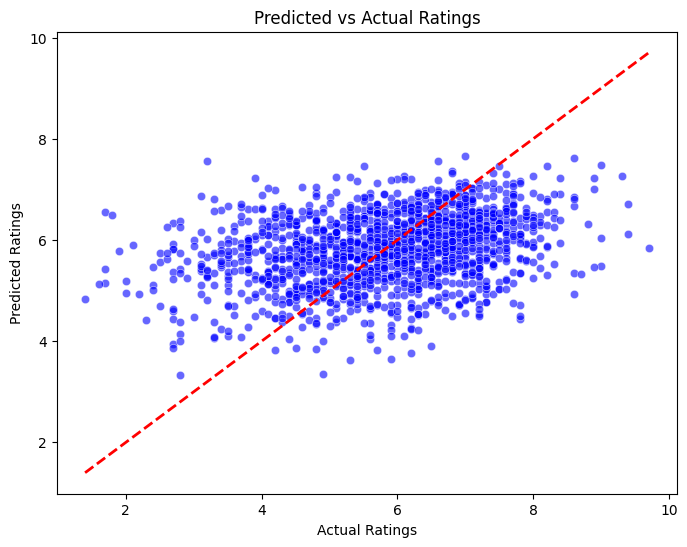

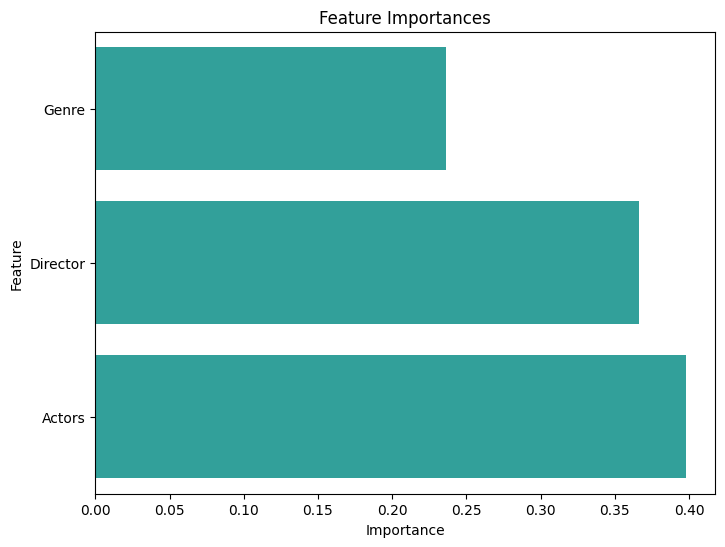

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Movies_India.csv', encoding='latin1')

# Inspect the dataset
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Select relevant columns
data = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

# Handle missing values (drop rows with missing target or features)
data = data.dropna()

# Combine actor columns into a single feature
data.loc[:, 'Actors'] = data['Actor 1'] + ', ' + data['Actor 2'] + ', ' + data['Actor 3']
data = data.drop(['Actor 1', 'Actor 2', 'Actor 3'], axis=1)

# Encode categorical features
label_encoders = {}
for col in ['Genre', 'Director', 'Actors']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop('Rating', axis=1)
y = data['Rating']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualize predictions vs actual ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# Feature importance visualization
feature_importances = model.feature_importances_
feature_names = ['Genre', 'Director', 'Actors']

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_names, color='lightseagreen')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# **Task 3**
# Iris Flower Classification

This task uses the Iris dataset to classify different species of iris flowers based on their physical measurements. The dataset contains features such as sepal length, sepal width, petal length, and petal width, and the goal is to predict the species of each iris flower.

## 1. Data Import and Setup
The necessary libraries for data manipulation, machine learning, and visualization are imported. These libraries include:
- **Pandas** for loading and handling the dataset.
- **NumPy** for numerical operations.
- **Matplotlib** and **Seaborn** for creating visualizations.
- **Scikit-learn** for machine learning tasks, such as model training and evaluation.

## 2. Loading the Dataset
The Iris dataset is loaded from a CSV file into a pandas DataFrame. This dataset consists of features describing iris flowers, such as sepal length, sepal width, petal length, and petal width, along with the target variable `species`, which indicates the type of iris flower.

## 3. Data Inspection
The first few rows of the dataset are displayed to get an initial overview of the data. Additionally, the presence of any missing values is checked.

## 4. Data Preparation
The dataset is split into:
- **Features (X)**: All columns except for the target column `species`.
- **Target (y)**: The `species` column, which represents the classification label.

## 5. Model Training
A **Random Forest Classifier** is trained on the entire dataset. Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It’s well-suited for classification problems like this one.

## 6. Feature Importance
The importance of each feature in predicting the target variable (species) is calculated using the Random Forest model’s `feature_importances_` attribute. The more important a feature is, the higher its value. This is visualized in a bar chart, showing the relative importance of each feature.

## 7. Data Splitting
The dataset is split into training and testing sets using **train_test_split**. Typically, 80% of the data is used for training, and 20% is used for testing.

## 8. Model Evaluation
After training the model, predictions are made on the testing set, and the model’s performance is evaluated using:
- **Accuracy**: The proportion of correct predictions made by the model.
- **Classification Report**: A detailed evaluation that includes metrics such as precision, recall, F1-score, and support for each class (iris species).

## 9. Visualization: Confusion Matrix
A **Confusion Matrix** is plotted to visualize the model’s performance. It shows the number of true positive, false positive, true negative, and false negative predictions, helping to identify any misclassifications. The matrix is displayed using a heatmap for better clarity.

## 10. Conclusion
This task demonstrates how the Iris dataset can be used to classify iris flower species using a Random Forest Classifier. The evaluation metrics, such as accuracy and the classification report, provide a comprehensive understanding of the model's performance. Additionally, the feature importance and confusion matrix offer insights into how the model makes its predictions and any areas where it can be improved.


Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Feature Importances:
        Feature  Importance
2  petal_length    0.436130
3   petal_width    0.436065
0  sepal_length    0.106128
1   sepal_width    0.021678


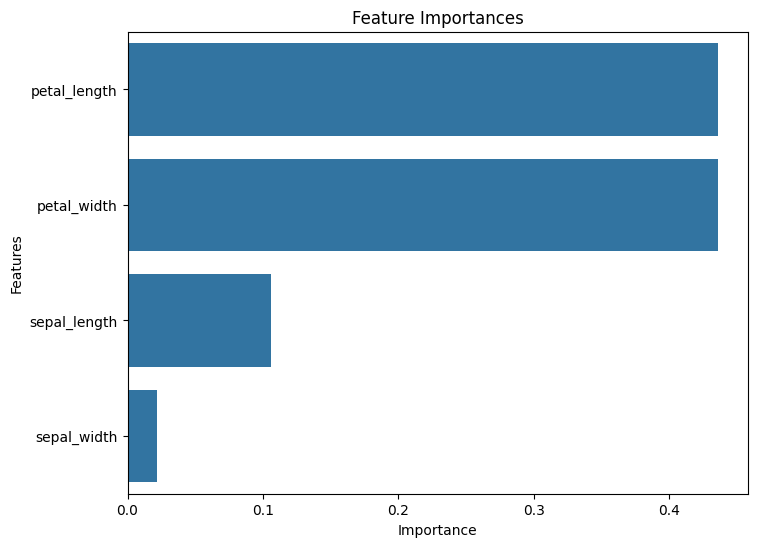


Model Evaluation Metrics:
Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



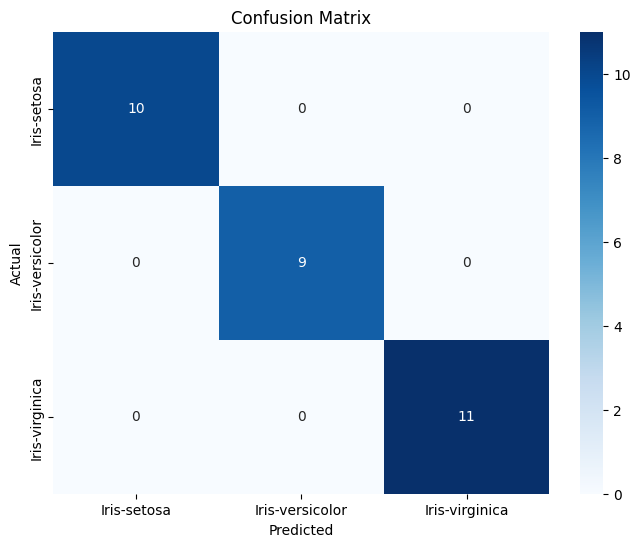

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
file_path = 'IRIS.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)  # Independent variables
y = data['species']  # Target variable

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Visualization: Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, legend=False)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Task 4**
# Advertising Sales Prediction

This task uses the Advertising dataset to predict sales based on the budget allocated to TV, radio, and newspaper advertisements. The dataset contains information on how much money was spent on each of these three advertisement channels and the corresponding sales for that period.

## 1. Data Import and Setup
The necessary libraries for data manipulation, machine learning, and visualization are imported. These libraries include:
- **Pandas** for loading and manipulating the dataset.
- **NumPy** for numerical operations.
- **Matplotlib** and **Seaborn** for creating visualizations.
- **Scikit-learn** for machine learning tasks such as model training and evaluation.

## 2. Loading the Dataset
The Advertising dataset is loaded from a CSV file into a pandas DataFrame. This dataset consists of features such as the budget for TV, radio, and newspaper advertisements, along with the target variable `Sales`, which represents the sales achieved during the advertising period.

## 3. Data Inspection
The first few rows of the dataset are displayed to get an initial overview. Additionally, the presence of any missing values is checked. Basic statistics about the dataset, such as mean, median, and standard deviation, are also computed.

## 4. Exploratory Data Analysis (EDA)
Several visualizations are created to explore the relationship between the features (TV, radio, newspaper) and the target variable (Sales):
- **Correlation Heatmap**: A heatmap is used to visualize the correlation between the features and the target. It helps identify which features are most strongly correlated with sales.
- **Scatter Plots**: Scatter plots are created for each feature (TV, radio, newspaper) vs. sales to better understand how each advertising channel is related to the sales.

## 5. Data Preparation
The dataset is split into:
- **Features (X)**: The columns `TV`, `Radio`, and `Newspaper`, which represent the independent variables used for predicting sales.
- **Target (y)**: The `Sales` column, which is the dependent variable.

## 6. Train-Test Split
The dataset is split into training and testing sets using **train_test_split**. Typically, 80% of the data is used for training, and 20% is used for testing.

## 7. Model Training
A **Linear Regression** model is initialized and trained using the training set. Linear regression is a simple model that attempts to find a linear relationship between the features and the target variable.

## 8. Model Evaluation
After training the model, predictions are made on the testing set, and the model’s performance is evaluated using the following metrics:
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between the predicted and actual sales. A lower value indicates better performance.
- **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted and actual sales. A lower value indicates better performance.
- **R-squared Score**: A statistic that explains how well the model’s predictions fit the actual data. A score closer to 1 indicates that the model fits the data well.

## 9. Visualization: Actual vs Predicted Sales
A scatter plot is created to visualize the relationship between the actual and predicted sales. The plot also includes a red dashed line representing the ideal scenario where the predicted sales equal the actual sales. Points along this line represent perfect predictions.

## 10. Conclusion
This task demonstrates how the Advertising dataset can be used to predict sales based on the budget spent on TV, radio, and newspaper advertisements using linear regression. The evaluation metrics (MAE, MSE, and R-squared) provide insights into the model's performance, while the visualizations help understand the relationship between the advertising budgets and the predicted sales.

Dataset Preview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Dataset Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


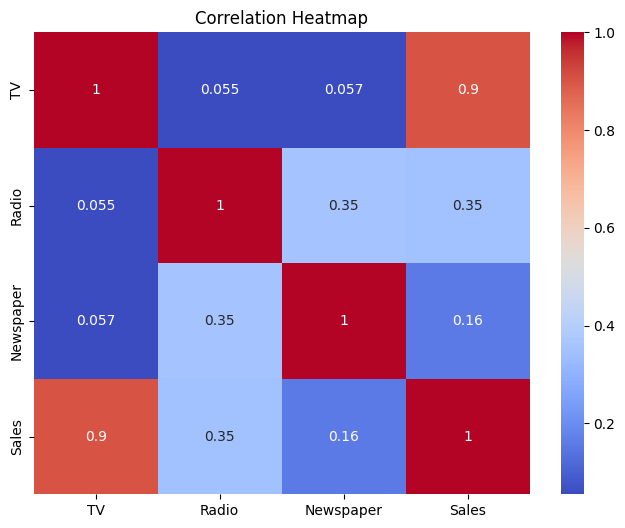

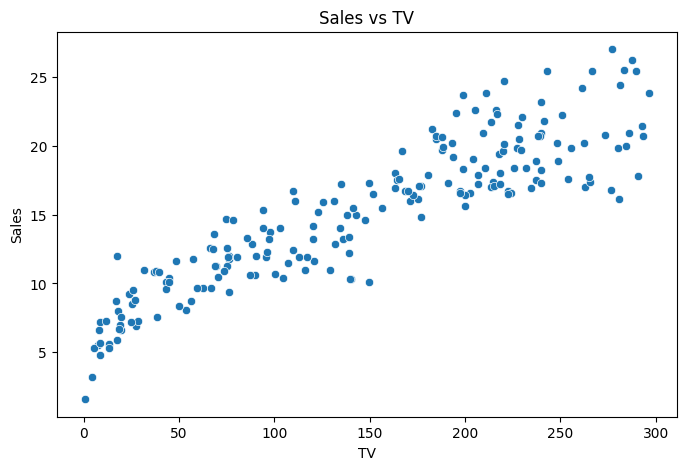

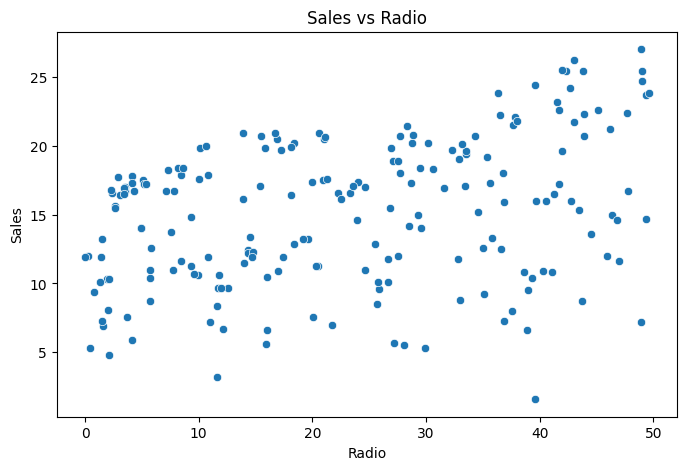

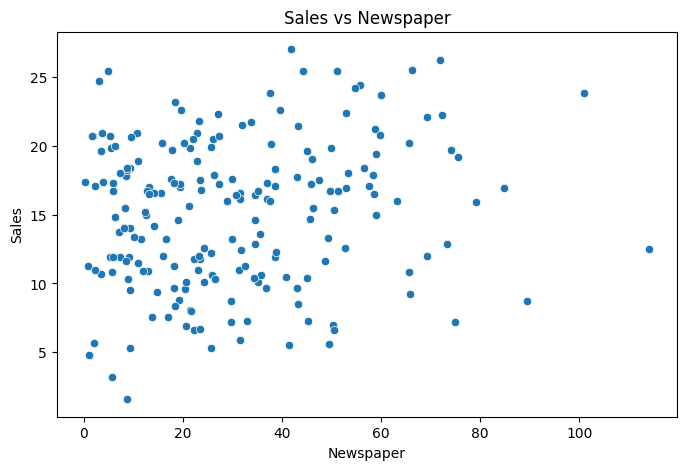


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
R-squared Score: 0.91

Actual vs Predicted Sales:
     Actual  Predicted
95     16.9  17.034772
15     22.4  20.409740
30     21.4  23.723989
158     7.3   9.272785
128    24.7  21.682719


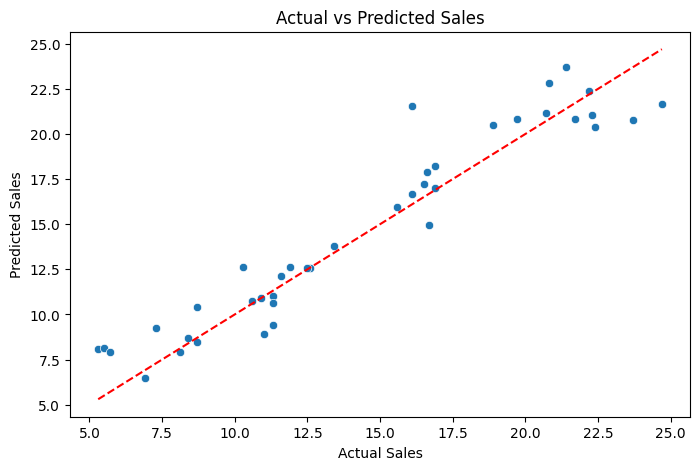

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'advertising.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Basic statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())

# Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for each feature vs Sales
features = ['TV', 'Radio', 'Newspaper']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature, y='Sales')
    plt.title(f'Sales vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()

# Split the dataset into features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = data['Sales']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")

# Display actual vs predicted sales
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Sales:")
print(results.head())

# Plot actual vs predicted sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=results['Actual'], y=results['Predicted'])
plt.plot([min(results['Actual']), max(results['Actual'])],
         [min(results['Actual']), max(results['Actual'])], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# **Task 5**
# Credit Card Fraud Detection

This task aims to detect fraudulent transactions in a credit card dataset using machine learning techniques. The dataset contains features related to credit card transactions, and the goal is to predict whether a transaction is fraudulent or not based on these features.

## 1. Data Import and Setup
We begin by importing the necessary libraries:
- **Pandas** for data manipulation.
- **NumPy** for numerical operations.
- **Scikit-learn** for machine learning algorithms and evaluation metrics.
- **Imbalanced-learn (imblearn)** for oversampling techniques to handle class imbalance.

The dataset is loaded from a CSV file, and the first few rows are displayed for inspection.

## 2. Missing Values Check
We check for any missing values in the dataset using the `isnull().sum()` method. This ensures the dataset is clean before further processing.

## 3. Feature Extraction
The dataset is split into:
- **Features (X)**: All columns except for the target variable 'Class', which contains information about whether a transaction is fraudulent (1) or genuine (0).
- **Target (y)**: The 'Class' column, which is the target variable.

## 4. Feature Normalization
The features are scaled using **StandardScaler** to ensure that all variables have the same scale. This is an important step for models that rely on distance-based calculations, like logistic regression.

## 5. Handling Class Imbalance using SMOTE
Since fraudulent transactions are rare, the dataset suffers from class imbalance. We use **SMOTE (Synthetic Minority Oversampling Technique)** to generate synthetic samples for the minority class (fraudulent transactions). This helps balance the dataset, improving the model's performance for predicting the minority class.

## 6. Data Sampling for Faster Processing
To speed up the experimentation process, we sample 10% of the resampled dataset, reducing the dataset size while maintaining the synthetic balancing done by SMOTE.

## 7. Train-Test Split
The dataset is split into training and testing sets using the **train_test_split** function. 80% of the data is used for training, and 20% is used for testing.

## 8. Model Training
We use **Logistic Regression** to train the model, as it is a faster algorithm suitable for experimentation. The model is trained on the resampled and normalized data.

## 9. Model Evaluation
After training the model, we make predictions on the test data and evaluate the model's performance using the following metrics:
- **F1 Score**: A measure of a model's accuracy, considering both precision and recall. It is particularly useful when dealing with imbalanced datasets.
- **Classification Report**: A detailed report showing precision, recall, and F1 score for each class (fraudulent and genuine).
- **Confusion Matrix**: A heatmap is used to visualize the performance of the classification model. It shows the number of correct and incorrect predictions for both the fraudulent and genuine classes.

## 10. Conclusion
This task demonstrates how to use logistic regression to detect fraudulent credit card transactions. By applying SMOTE to handle class imbalance and evaluating the model with key metrics, we gain insights into the model's performance and its ability to accurately predict fraudulent transactions.

Dataset Preview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

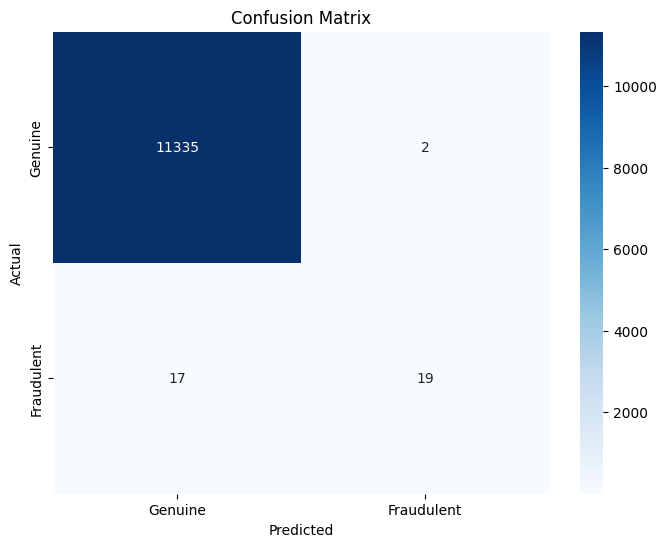

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE  # For oversampling

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Feature extraction: Separate features and target variable
X = data.drop('Class', axis=1)  # All columns except 'Class' are features
y = data['Class']  # 'Class' is the target (fraudulent = 1, genuine = 0)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Sample a smaller portion of the dataset for faster processing (use 10% of the resampled data)
X_resampled_sampled = X_resampled[:int(len(X_resampled) * 0.1)]  # Use 10% of the data
y_resampled_sampled = y_resampled[:int(len(y_resampled) * 0.1)]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_sampled, y_resampled_sampled, test_size=0.2, random_state=42)

# Train a classification model (Random Forest or Logistic Regression)
# Using Logistic Regression as a faster alternative for experimentation
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
print("\nModel Evaluation Metrics:")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization: Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraudulent'], yticklabels=['Genuine', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()